In [6]:
from bs4 import BeautifulSoup as bs
import requests

In [7]:
url = "https://friendorfollow.com/twitter/most-followers/"
response=requests.get(url)
soup=bs(response.text,"lxml")
user=[]
for i in range(1,101):
    tweets = soup.findAll('li',{"class":'row-'+str(i)+' ver'})
    for tweet in tweets:
        usern=(tweet.find('p',{"class":'mail'}).text.strip())      
        user.append(usern)
       
print("The top 100 users with maximum followers are:")
print(user)

The top 100 users with maximum followers are:
['@katyperry', '@BarackObama', '@justinbieber', '@rihanna', '@taylorswift13', '@ladygaga', '@TheEllenShow', '@Cristiano', '@YouTube', '@jtimberlake', '@ArianaGrande', '@KimKardashian', '@realDonaldTrump', '@selenagomez', '@britneyspears', '@Twitter', '@cnnbrk', '@shakira', '@jimmyfallon', '@BillGates', '@narendramodi', '@JLo', '@nytimes', '@neymarjr', '@BrunoMars', '@KingJames', '@Oprah', '@MileyCyrus', '@CNN', '@NiallOfficial', '@BBCBreaking', '@Drake', '@iamsrk', '@instagram', '@SrBachchan', '@BeingSalmanKhan', '@SportsCenter', '@KevinHart4real', '@LilTunechi', '@espn', '@wizkhalifa', '@Harry_Styles', '@Louis_Tomlinson', '@LiamPayne', '@Pink', '@realmadrid', '@onedirection', '@NASA', '@aliciakeys', '@akshaykumar', '@chrisbrown', '@KAKA', '@kanyewest', '@FCBarcelona', '@EmmaWatson', '@imVkohli', '@sachin_rt', '@PMOIndia', '@ConanOBrien', '@zaynmalik', '@Adele', '@NBA', '@KendallJenner', '@ActuallyNPH', '@khloekardashian', '@KylieJenner', '

In [8]:
import re
user_list=[]
def extract_user(handle_name):
    
    name = re.sub('@','', handle_name)
    return name
        
# Apply the function to the Length column and take a look at both columns
for i in user:
    a=(extract_user(i))
    user_list.append(a)


In [9]:
import tweepy
from tweepy import OAuthHandler
from tweepy import API
from tweepy import Stream

In [11]:

# Consumer key authentication
auth = OAuthHandler(consumer_key, consumer_secret)


In [12]:

# Access key authentication
auth.set_access_token(access_token, access_token_secret)

# Set up the API with the authentication handler
api = API(auth)

In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
t1=[]
t2=[]
t3=[]
t4=[]
t5=[]
t6=[]
t7=[]
handle=user_list
for i in handle:
    url = "https://twitter.com/"+i
    response = requests.get(url)
    soup = BeautifulSoup(response.text,"lxml")
    tweets = soup.findAll('li',{"class":'js-stream-item'})
    for tweet in tweets:
        if tweet.find('p',{"class":'tweet-text'}):
            tweet_user = tweet.find('span',{"class":'username'}).text.strip()
            tweet_text = tweet.find('p',{"class":'tweet-text'}).text.encode('utf8').strip()
            replies = tweet.find('span',{"class":"ProfileTweet-actionCount"}).text.strip()
            retweets = tweet.find('span', {"class" : "ProfileTweet-action--retweet"}).text.strip()
            follow_box = soup.find('li',{'class':'ProfileNav-item ProfileNav-item--followers'})
            followers = follow_box.find('a').find('span',{'class':'ProfileNav-value'})
            likes=tweet.find('span', {"class" : "ProfileTweet-action--favorite"}).text.strip()
            if tweet.find('li',{"class":'ProfileNav-item ProfileNav-item--following'}):
                following_box = soup.find('li',{'class':'ProfileNav-item ProfileNav-item--following'})
                following = following_box.find('a').find('span',{'class':'ProfileNav-value'})
           
            
                      
            #span class="ProfileTweet-actionCountForAria"
            if(tweet_user=="@"+i):
                t1.append(tweet_user)
                t2.append(tweet_text)
                t3.append(replies)
                t4.append(retweets)
                t5.append(followers.get('data-count'))
                t6.append(likes)
                if tweet.find('li',{"class":'ProfileNav-item ProfileNav-item--following'}):
                    t7.append(following.get('data-count'))
                else:
                    t7.append(0)
            else:
                continue



In [15]:
df=pd.DataFrame({"Tweet_user":t1,
                 "tweet_text":t2,
                 "replies":t3,
                 "retweets":t4,
                 "followers":t5,
                 "likes":t6,
                 "following":t7
                 })
df.head()

,Tweet_user,tweet_text,replies,retweets,followers,likes,following
0,@katyperry,b'That\xe2\x80\x99s the 3rd straight Sunday in...,342 replies .,364 retweets,107034706,"3,858 likes",0
1,@katyperry,"b'One foot in front of the other, #LaurenEngle...",102 replies .,230 retweets,107034706,"2,238 likes",0
2,@katyperry,b'I love pirates too #americanidol',238 replies .,271 retweets,107034706,"3,274 likes",0
3,@katyperry,b'I mean I wasn\xe2\x80\x99t lyin...#AmericanI...,150 replies .,212 retweets,107034706,"1,793 likes",0
4,@katyperry,b'#worlddidyouseethat #americanidol',117 replies .,168 retweets,107034706,"1,496 likes",0


In [16]:
import re
def clean(data):
    newdata=re.sub('[^0-9]','',data)
    return newdata

df['replies']=df['replies'].apply(lambda row:clean(row))
df['retweets']=df['retweets'].apply(lambda row:clean(row))
df['likes']=df['likes'].apply(lambda row:clean(row))

df.head()
df1=df.drop(['tweet_text','following'],axis=1)
df1.head()

,Tweet_user,replies,retweets,followers,likes
0,@katyperry,342,364,107034706,3858
1,@katyperry,102,230,107034706,2238
2,@katyperry,238,271,107034706,3274
3,@katyperry,150,212,107034706,1793
4,@katyperry,117,168,107034706,1496


In [17]:
df2=df1.groupby(['Tweet_user']).sum(axis=1)
df2.head()

,replies,retweets,followers,likes
Tweet_user,,,,
@3gerardpique,9819075071328335816552644937182172844572661524,2302020014521022919440133601513241040769653372...,1911498219114982191149821911498219114982191149...,4062110185278833236241072897871411322549182471...
@ActuallyNPH,413988108475031421193146732577456043491843664,2671787227838361908156451132573716162171052016...,2707394127073941270739412707394127073941270739...,1872131014093037485316933102024632763161216995...
@Adele,8091221114075751156713591715699107174215771851...,3452675991084435266913413593764846773895402991...,2784804027848040278480402784804027848040278480...,2086260561722293143016678112454105772583391053...
@AlejandroSanz,9466701742524109432975164530179253494405255210...,2133127862492610276508754591661308012077313758...,1948949719489497194894971948949719489497194894...,8050778722333541419014363388133739351278553852...
@ArianaGrande,2595277015512133377437291321224311771461233642...,1476714141335510552109352092231043850280758796...,6146234361462343614623436146234361462343614623...,1058351139874930237246124701187962398644640439...


In [18]:
import numpy as np
df2['replies_new']=(df2['replies']).astype(float)
df2['retweets_new']=(df2['retweets']).astype(float)
df2['likes_new']=(df2['likes']).astype(float)
df2['followers_new']=(df2['followers']).astype(float)
df2['replies_log']=np.log(df2['replies_new'])
df2['retweets_log']=np.log(df2['retweets_new'])
df2['likes_log']=np.log(df2['likes_new'])
df2['followers_log']=np.log(df2['followers_new']).astype(float)
df3=df2[['replies_log','retweets_log','likes_log','followers_log']]
df3.columns

Index(['replies_log', 'retweets_log', 'likes_log', 'followers_log'], dtype='object')

C:\Users\Janani\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


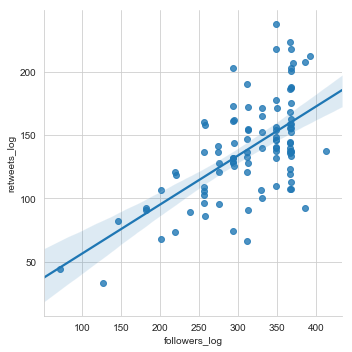

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
df3['user']=df3.index
sns.set_style('whitegrid')#display grid 
#default - sns.set()

sns.lmplot(data=df3,
            x=('followers_log'),
            y='retweets_log',
           #hue='user'
          )


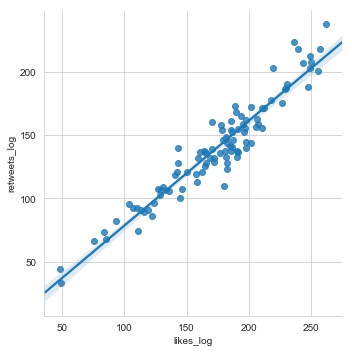

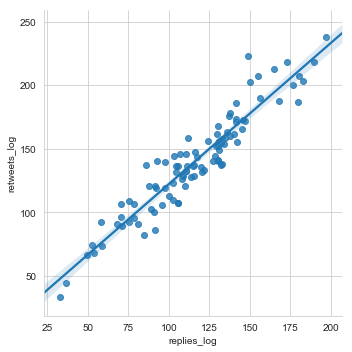

In [20]:
sns.lmplot(data=df3,
            x=('likes_log'),
            y='retweets_log'
           #hue='user'
          )
sns.lmplot(data=df3,
            x=('replies_log'),
            y='retweets_log'
           #hue='user'
          )